In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import json

In [17]:
#Membuka File CSV
file=pd.read_csv("produksi_minyak_mentah.csv")
print(file)

     kode_negara  tahun   produksi
0            AUS   1971  14226.194
1            AUS   1972  15029.094
2            AUS   1973  18720.577
3            AUS   1974  18498.696
4            AUS   1975  19736.070
...          ...    ...        ...
5834         ZWE   2011      0.000
5835         ZWE   2012      0.000
5836         ZWE   2013      0.000
5837         ZWE   2014      0.000
5838         ZWE   2015      0.000

[5839 rows x 3 columns]


In [18]:
#Mengekstrak file json
file2=open('kode_negara_lengkap.json',"r")
file2=json.load(file2)
file2

[{'name': 'Afghanistan',
  'alpha-2': 'AF',
  'alpha-3': 'AFG',
  'country-code': '004',
  'iso_3166-2': 'ISO 3166-2:AF',
  'region': 'Asia',
  'sub-region': 'Southern Asia',
  'intermediate-region': '',
  'region-code': '142',
  'sub-region-code': '034',
  'intermediate-region-code': ''},
 {'name': 'Ã…land Islands',
  'alpha-2': 'AX',
  'alpha-3': 'ALA',
  'country-code': '248',
  'iso_3166-2': 'ISO 3166-2:AX',
  'region': 'Europe',
  'sub-region': 'Northern Europe',
  'intermediate-region': '',
  'region-code': '150',
  'sub-region-code': '154',
  'intermediate-region-code': ''},
 {'name': 'Albania',
  'alpha-2': 'AL',
  'alpha-3': 'ALB',
  'country-code': '008',
  'iso_3166-2': 'ISO 3166-2:AL',
  'region': 'Europe',
  'sub-region': 'Southern Europe',
  'intermediate-region': '',
  'region-code': '150',
  'sub-region-code': '039',
  'intermediate-region-code': ''},
 {'name': 'Algeria',
  'alpha-2': 'DZ',
  'alpha-3': 'DZA',
  'country-code': '012',
  'iso_3166-2': 'ISO 3166-2:DZ',
  

In [19]:
#Mengonversi kode negara menjadi nama negara lengkap
nama_negara={item['alpha-3']:item['name']for item in file2}
file.loc[:,'kode_negara']=file['kode_negara'].map(nama_negara)
print(file)

     kode_negara  tahun   produksi
0      Australia   1971  14226.194
1      Australia   1972  15029.094
2      Australia   1973  18720.577
3      Australia   1974  18498.696
4      Australia   1975  19736.070
...          ...    ...        ...
5834    Zimbabwe   2011      0.000
5835    Zimbabwe   2012      0.000
5836    Zimbabwe   2013      0.000
5837    Zimbabwe   2014      0.000
5838    Zimbabwe   2015      0.000

[5839 rows x 3 columns]


In [20]:
#Mengeksklude data produksi minyak yang tidak terdapat dalam kode_negara_lengkap
file.dropna(subset=["kode_negara"], inplace=True)
file=file.rename(columns={'kode_negara':'nama_negara'})
print(file)

     nama_negara  tahun   produksi
0      Australia   1971  14226.194
1      Australia   1972  15029.094
2      Australia   1973  18720.577
3      Australia   1974  18498.696
4      Australia   1975  19736.070
...          ...    ...        ...
5834    Zimbabwe   2011      0.000
5835    Zimbabwe   2012      0.000
5836    Zimbabwe   2013      0.000
5837    Zimbabwe   2014      0.000
5838    Zimbabwe   2015      0.000

[5633 rows x 3 columns]


In [21]:
#Mendapatkan nama negara lengkap sesuai data yang berhasil diekstrak dan mengubahnya dalam bentuk list #Menghapus nama negara duplikat
list_namanegara=file['nama_negara'].drop_duplicates().tolist()
print(list_namanegara)

['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea, Republic of', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Egypt', 'Estonia', 'Ethiopia', 'Georgia', 'Ghana', 'Haiti', 'Hong Kong', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Israel', 'Kazakhstan', 'Latvia', 'Lithuania', 'North Macedonia', 'Malaysia', 'Malta', 'Moldova, Republic of', 'Mozambique', 'Nigeria', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Sl

   Country's name  Year  Production
0       Australia  1971   14226.194
1       Australia  1972   15029.094
2       Australia  1973   18720.577
3       Australia  1974   18498.696
4       Australia  1975   19736.070
5       Australia  1976   20177.769
6       Australia  1977   21259.310
7       Australia  1978   20694.803
8       Australia  1979   20828.964
9       Australia  1980   19471.877
10      Australia  1981   19007.475
11      Australia  1982   18706.129
12      Australia  1983   18220.054
13      Australia  1984   22148.899
14      Australia  1985   25468.860
15      Australia  1986   26561.559
16      Australia  1987   26399.764
17      Australia  1988   26322.923
18      Australia  1989   23679.705
19      Australia  1990   26752.604


Text(0.5, 0, 'Year')

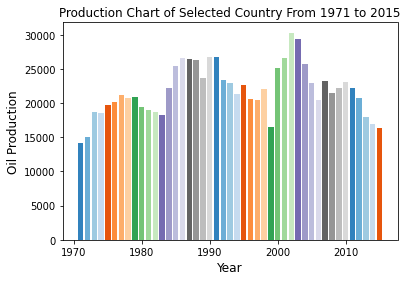

In [22]:
#Membuat Grafik jumlah produksi minyak mentah terhadap waktu (tahun) dari suatu negara N, dimana nilai N dapat dipilih oleh user secara interaktif
#Misal Australia/indeks 0
negara_pilihan=list_namanegara[0]

#Memfilter data frame dari CSV sesuai dengan negara yang dipilih
filter=file['nama_negara']==negara_pilihan
data_pilihan=file[filter].rename(columns={'nama_negara':"Country's name", 'tahun':'Year', 'produksi':'Production'})

#Fitur Tambahan berupa Tampilan Tabel pilihan
n_tampil=20
tabel_tampilan=data_pilihan.head(n_tampil)
print(tabel_tampilan)##Yeay bisa juga:)

#Fitur wajib 1: Membuat Grafiknya
cmap_name = 'tab20c'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(data_pilihan)]
fig, ax = plt.subplots()
ax.bar(data_pilihan['Year'] ,data_pilihan['Production'],color=colors)
ax.set_title("Production Chart of Selected Country From 1971 to 2015")
ax.set_ylabel('Oil Production', fontsize=12)
ax.set_xlabel('Year',fontsize=12)  

                          Country's name  Year  Production
1305            United States of America  1971  482149.550
3059                        Saudi Arabia  1971  241141.895
2408          Iran (Islamic Republic of)  1971  230174.161
5704  Venezuela (Bolivarian Republic of)  1971  197992.167
4808                              Kuwait  1971  155964.539
4924                               Libya  1971  136070.985
4628                                Iraq  1971   85181.190
2763                             Nigeria  1971   77109.593
135                               Canada  1971   67007.824
3426                United Arab Emirates  1971   51909.402


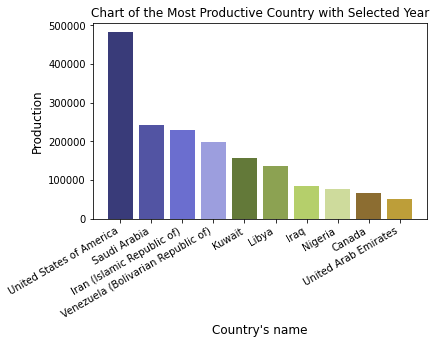

In [23]:
#Grafik yang menunjukan B-besar negara dengan jumlah produksi terbesar pada tahun T, dimana nilai B dan T dapat dipilih oleh user secara interaktif.
#Misal banyak negara=10, Tahun 1971
count_country=10
year=1971
filter=file['tahun']==year

#Fitur tambahan berupa tabel pilihan2
data_pilihan2=file[filter].sort_values(by=['produksi'], ascending=False).head(count_country)
data_tampil2=data_pilihan2.rename(columns={'nama_negara':"Country's name", 'tahun':'Year', 'produksi':'Production'})
print(data_tampil2)

#Fitur wajib 2: Membuat Grafiknya
cmap_name = 'tab20b'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(data_pilihan2)]
fig, ax = plt.subplots()
ax.bar(data_pilihan2['nama_negara'] ,data_pilihan2['produksi'],color=colors)
ax.set_title("Chart of the Most Productive Country with Selected Year")
ax.set_ylabel('Production', fontsize=12)
ax.set_xlabel("Country's name",fontsize=12)
fig.autofmt_xdate()

                          Country's name  Production  Cumulative_Production
3059                        Saudi Arabia  241141.895           1.771177e+07
1305            United States of America  482149.550           1.672414e+07
3033                  Russian Federation  516040.215           1.070275e+07
2408          Iran (Islamic Republic of)  230174.161           8.376461e+06
5704  Venezuela (Bolivarian Republic of)  197992.167           6.573346e+06
1880                               China   40119.734           6.422426e+06
765                               Mexico   23640.056           5.771632e+06
4808                              Kuwait  155964.539           4.654152e+06
4628                                Iraq   85181.190           4.471448e+06
2763                             Nigeria   77109.593           4.457241e+06


C:\Users\HP\AppData\Local\Temp/ipykernel_20560/1902738354.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_pilihan3['nama_negara'], rotation=0)


Text(0.5, 0, 'Cumulative Production')

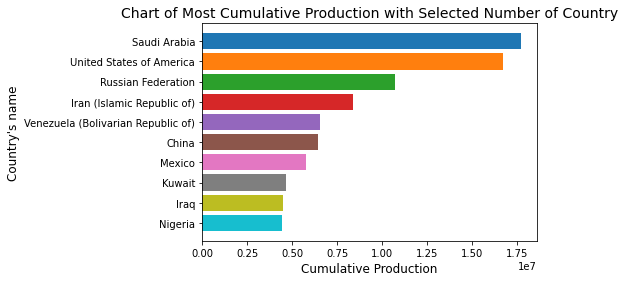

In [24]:
#Grafik yang menunjukan B-besar negara dengan jumlah produksi terbesar secara kumulatif keseluruhan tahun, dimana nilai B dapat dipilih oleh user secara interaktif.
file['produksi_kumulatif'] = file.groupby(['nama_negara'])['produksi'].transform('sum')
new_file = file.drop_duplicates(subset=['nama_negara'])

#Fitur tambahan berupa Tabel Pilihan 3
data_pilihan3=new_file.sort_values(by=['produksi_kumulatif'], ascending=False).head(count_country)
data_tampil3=data_pilihan3.drop("tahun", inplace=False, axis=1).rename(columns={'nama_negara':"Country's name",'produksi':'Production','produksi_kumulatif':'Cumulative_Production'})
print(data_tampil3)

#Fitur Wajib 3: Membuat Grafiknya
cmap_name = 'tab10'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(data_pilihan3)]
fig, ax = plt.subplots()
ax.barh(data_pilihan3['nama_negara'] ,data_pilihan3['produksi_kumulatif'],color=colors)
ax.set_yticklabels(data_pilihan3['nama_negara'], rotation=0)
ax.invert_yaxis() 
ax.set_title("Chart of Most Cumulative Production with Selected Number of Country", fontsize=14)
ax.set_ylabel("Country's name", fontsize=12)
ax.set_xlabel('Cumulative Production',fontsize=12)


    Year  Total_Production
44  2015         3934946.0
    Year  Total_Production
12  1983       2076524.432


Text(0.5, 0, 'Year')

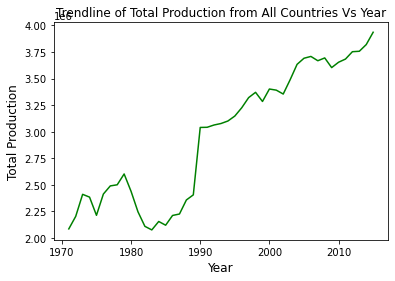

In [25]:
#Grafik yang menunjukan trendline jumlah produksi kumulatif dari seluruh negara di setiap tahun
file['Total_Production'] = file.groupby(['tahun'])['produksi'].transform('sum')
file_new = file.drop_duplicates(subset=['tahun']).drop(columns='nama_negara', axis=1).drop(columns='produksi_kumulatif', axis=1).drop(columns='produksi', axis=1).rename(columns={'tahun':'Year'})
max_year=file_new.sort_values(by=['Total_Production'], ascending=False).head(1)
min_year=file_new.sort_values(by=['Total_Production'], ascending=True).head(1)
print(max_year)
print(min_year)
#Grafik
cmap_name = 'tab20'
cmap = cm.get_cmap(cmap_name)
colors = cmap.colors[:len(file_new)]
fig, ax = plt.subplots()
color='green'
ax.plot(file_new['Year'] ,file_new['Total_Production'],color=color)
ax.set_title("Trendline of Total Production from All Countries Vs Year")
ax.set_ylabel("Total Production", fontsize=12)
ax.set_xlabel('Year',fontsize=12)

In [26]:
#Informasi yang menyebutkan: (1) nama lengkap negara, kode negara, region, dan sub-region dengan jumlah produksi terbesar pada tahun T dan keseluruhan tahun. 
#(1)
#Berdasarkan Tahun Inputan User (pada Tahun T)
filter=file['tahun']==year
max_pil=file[filter].sort_values(by=['produksi'], ascending=False).head(1)
prod=np.asarray(max_pil['produksi'])
print(prod)
negara_max_pil=np.asarray(max_pil['nama_negara'])
print(negara_max_pil)
for item in file2:
    if (item['name'])==negara_max_pil:
        kode=[item['alpha-3']]
        region=[item['region']]
        sub_region=[item['sub-region']]
kode=np.asarray(kode)
region=np.asarray(region)
sub_region=np.asarray(sub_region)
print(kode)
print(region)
print(sub_region)

#Berdasarkan Keseluruhan Tahun
max_total=file.sort_values(by=['produksi_kumulatif'], ascending=False).head(1)
prod=np.asarray(max_total['produksi_kumulatif'])
print(prod)
negara_max_total=np.asarray(max_total['nama_negara'])
print(negara_max_total)
for item in file2:
    if (item['name'])==negara_max_total:
        kode=[item['alpha-3']]
        region=[item['region']]
        sub_region=[item['sub-region']]
kode=np.asarray(kode)
region=np.asarray(region)
sub_region=np.asarray(sub_region)
print(kode)
print(region)
print(sub_region)


[482149.55]
['United States of America']
['USA']
['Americas']
['Northern America']
[17711766.321]
['Saudi Arabia']
['SAU']
['Asia']
['Western Asia']


In [27]:
'''(2) nama lengkap negara, kode negara, region, dan sub-region dengan jumlah produksi terkecil (tidak sama dengan nol)
pada tahun T dan keseluruhan tahun. '''
#(2)
#Berdasarkan Tahun Inputan User (pada Tahun T)
filter1=file['produksi']!=0
min_data=file[filter1].sort_values(by=['produksi'], ascending=True)
filter2=min_data['tahun']==year
min_pil=min_data[filter2].sort_values(by=['produksi'], ascending=True).head(1)
prod=np.asarray(min_pil['produksi'])
print(prod)
negara_min_pil=np.asarray(min_pil['nama_negara'])
print(negara_min_pil)
for item in file2:
    if (item['name'])==negara_min_pil:
        kode=[item['alpha-3']]
        region=[item['region']]
        sub_region=[item['sub-region']]
kode=np.asarray(kode)
region=np.asarray(region)
sub_region=np.asarray(sub_region)
print(kode)
print(region)
print(sub_region)

#Berdasarkan Keseluruhan Tahun
filter3=file['produksi_kumulatif']!=0
min_total=file[filter3].sort_values(by=['produksi_kumulatif'], ascending=True).head(1)
prod=np.asarray(min_total['produksi_kumulatif'])
print(prod)
negara_min_total=np.asarray(min_total['nama_negara'])
print(negara_min_total)
for item in file2:
    if (item['name'])==negara_min_total:
        kode=[item['alpha-3']]
        region=[item['region']]
        sub_region=[item['sub-region']]
kode=np.asarray(kode)
region=np.asarray(region)
sub_region=np.asarray(sub_region)
print(kode)
print(region)
print(sub_region)

[13.234]
['Thailand']
['THA']
['Asia']
['South-eastern Asia']
[17.306]
['Senegal']
['SEN']
['Africa']
['Sub-Saharan Africa']


In [28]:
'''(3) nama lengkap negara, kode negara, region, dan sub-region dengan jumlah produksi sama dengan nol pada tahun T dan keseluruhan tahun.'''
#(3)
#Berdasarkan Tahun Inputan User (pada Tahun T)
filter1=file['produksi']==0
nol_data=file[filter1].sort_values(by=['produksi'])
filter2=nol_data['tahun']==year
nol_pil=nol_data[filter2].sort_values(by=['produksi']).drop(columns='produksi_kumulatif', axis=1)

negara_nol_pil=nol_pil['nama_negara'].values.tolist()
list_kode=[]
list_region=[]
list_subregion=[]
for negara in negara_nol_pil:
    for item in file2:
        if (item['name'])==negara:
            kode=[(item['alpha-3'])]
            region=(item['region'])
            sub_region=(item['sub-region'])
            list_kode.append(kode)
            list_region.append(region)
            list_subregion.append(sub_region)
#Mengubah ke data frame agar mudah dibaca
nol_pil["Country's Code"]=list_kode
nol_pil["Region"]=list_region
nol_pil["Sub-Region"]=list_subregion
nol_pil=nol_pil.rename(columns={'nama_negara':"Country's name",'produksi':'Production','tahun':'Year'})
nol_pil


,Country's name,Year,Production,Total_Production,Country's Code,Region,Sub-Region
90,Belgium,1971,0.0,2086017.074,[BEL],Europe,Western Europe
1170,Switzerland,1971,0.0,2086017.074,[CHE],Europe,Western Europe
855,New Zealand,1971,0.0,2086017.074,[NZL],Oceania,Australia and New Zealand
990,Portugal,1971,0.0,2086017.074,[PRT],Europe,Southern Europe
1125,Sweden,1971,0.0,2086017.074,[SWE],Europe,Northern Europe
1996,Cyprus,1971,0.0,2086017.074,[CYP],Asia,Western Asia
1582,Bangladesh,1971,0.0,2086017.074,[BGD],Asia,Southern Asia
405,Greece,1971,0.0,2086017.074,[GRC],Europe,Southern Europe
495,Iceland,1971,0.0,2086017.074,[ISL],Europe,Northern Europe
225,Denmark,1971,0.0,2086017.074,[DNK],Europe,Northern Europe


In [29]:
#Berdasarkan keseluruhan data (Lanjutan Fitur sebelumnya)
filter3=file['produksi_kumulatif']==0
nol_total=file[filter3].sort_values(by=['produksi_kumulatif']).drop(columns='produksi', axis=1).drop(columns='tahun',axis=1).drop_duplicates(subset=['nama_negara'])
nol_total
negara_nol_total=nol_total['nama_negara'].values.tolist()
list_kode=[]
list_region=[]
list_subregion=[]
for negara in negara_nol_total:
    for item in file2:
        if (item['name'])==negara:
            kode=[(item['alpha-3'])]
            region=(item['region'])
            sub_region=(item['sub-region'])
            list_kode.append(kode)
            list_region.append(region)
            list_subregion.append(sub_region)
#Mengubah ke data frame agar mudah dibaca
nol_total["Country's Code"]=list_kode
nol_total["Region"]=list_region
nol_total["Sub-Region"]=list_subregion
nol_total=nol_total.rename(columns={'nama_negara':"Country's name",'produksi_kumulatif':'Cumulative_Production'})
nol_total

,Country's name,Cumulative_Production,Total_Production,Country's Code,Region,Sub-Region
90,Belgium,0.0,2086017.074,[BEL],Europe,Western Europe
4425,El Salvador,0.0,2203851.927,[SLV],Americas,Latin America and the Caribbean
4378,Dominican Republic,0.0,3934946.000,[DOM],Americas,Latin America and the Caribbean
4284,Korea (Democratic People's Republic of),0.0,3682895.173,[PRK],Asia,Eastern Asia
4618,Honduras,0.0,3707538.261,[HND],Americas,Latin America and the Caribbean
4689,Jamaica,0.0,2226108.548,[JAM],Americas,Latin America and the Caribbean
4477,Eritrea,0.0,3401202.667,[ERI],Africa,Sub-Saharan Africa
3583,Zambia,0.0,3076829.519,[ZMB],Africa,Sub-Saharan Africa
3680,Montenegro,0.0,3693451.702,[MNE],Europe,Southern Europe
3514,Uruguay,0.0,3819074.395,[URY],Americas,Latin America and the Caribbean


['OEU', 'WLD', 'EU28', 'G20', 'OECD']


Text(0.5, 0, 'Year')

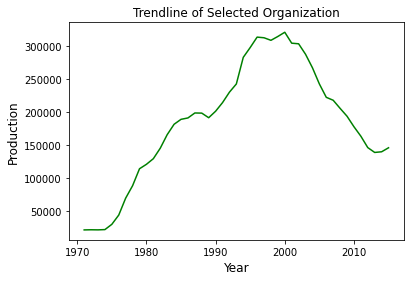

In [30]:
#Fitur tambahan membuat trendline produksi minyak dari organisasi/non negara
file3=pd.read_csv("produksi_minyak_mentah.csv")
list=file3['kode_negara'].drop_duplicates().values.tolist()
list_org=[]
list_lengkap=[]
for item in file2:
    list_lengkap.append(item['alpha-3'])
for kode in list:
    if kode not in list_lengkap:
        list_org.append(kode)
print(list_org)
#misal OEU / indeks 0 (dipilih interaktif oleh user)
filter=file3['kode_negara']==list_org[0]
org=file3[filter]
fig,ax=plt.subplots()
color='green'
ax.plot(org['tahun'] ,org['produksi'],color=color)
ax.set_title("Trendline of Selected Organization")
ax.set_ylabel("Production", fontsize=12)
ax.set_xlabel('Year',fontsize=12)
